In [ ]:
# Import libaries
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime

/var/folders/5k/b8_r8jw502n4zztm42zd76m80000gn/T/ipykernel_23486/4027181063.py:18: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  hashtag_posts= pd.read_csv("../../data/filtered_data/hashtags_posts.csv")


In [ ]:
# Read file
hashtag_posts= pd.read_csv("../../data/filtered_data/hashtags_posts.csv")

In [2]:
len(hashtag_posts) 
hashtag_posts.columns

Index(['post_id', 'text', 'textLanguage', 'createTimeISO', 'isAd',
       'author_nickName', 'author_signature', 'author_fans', 'video_duration',
       'webVideoUrl', 'diggCount', 'shareCount', 'playCount', 'collectCount',
       'commentCount', 'isSponsored', 'hashtag_name', 'hashtag_title',
       'searchHashtag_name', 'searchHashtag_views', 'location_address',
       'date'],
      dtype='object')

In [ ]:
hashtag_posts['createTimeISO'] = pd.to_datetime(hashtag_posts['createTimeISO'])
# Create new columns
hashtag_posts['date'] = hashtag_posts['createTimeISO'].dt.date
hashtag_posts['month'] = hashtag_posts['createTimeISO'].dt.strftime('%b')   # e.g., 'Feb'
hashtag_posts['year'] = hashtag_posts['createTimeISO'].dt.year
hashtag_posts['week'] = hashtag_posts['createTimeISO'].dt.isocalendar().week

hashtag_posts.head()

,post_id,text,textLanguage,createTimeISO,isAd,author_nickName,author_signature,author_fans,video_duration,webVideoUrl,...,isSponsored,hashtag_name,hashtag_title,searchHashtag_name,searchHashtag_views,location_address,date,month,year,week
0,7472533937667968278,Aquafacial🫧 Boost für deine Haut💆🏻‍♀️ Tief ger...,de,2025-02-17 23:28:17+00:00,False,SKINID_STUDIO,all about ✨Aquafacial & Microneedling✨ \nat @k...,32,10,https://www.tiktok.com/@skinid_studio/video/74...,...,False,appointment,NaN,hautpflege,2700000000,"Nurnberg, Bavaria, Germany",2025-02-17,Feb,2025,8
1,7472533937667968278,Aquafacial🫧 Boost für deine Haut💆🏻‍♀️ Tief ger...,de,2025-02-17 23:28:17+00:00,False,SKINID_STUDIO,all about ✨Aquafacial & Microneedling✨ \nat @k...,32,10,https://www.tiktok.com/@skinid_studio/video/74...,...,False,treatment,NaN,hautpflege,2700000000,"Nurnberg, Bavaria, Germany",2025-02-17,Feb,2025,8
2,7472533937667968278,Aquafacial🫧 Boost für deine Haut💆🏻‍♀️ Tief ger...,de,2025-02-17 23:28:17+00:00,False,SKINID_STUDIO,all about ✨Aquafacial & Microneedling✨ \nat @k...,32,10,https://www.tiktok.com/@skinid_studio/video/74...,...,False,pflege,NaN,hautpflege,2700000000,"Nurnberg, Bavaria, Germany",2025-02-17,Feb,2025,8
3,7472533937667968278,Aquafacial🫧 Boost für deine Haut💆🏻‍♀️ Tief ger...,de,2025-02-17 23:28:17+00:00,False,SKINID_STUDIO,all about ✨Aquafacial & Microneedling✨ \nat @k...,32,10,https://www.tiktok.com/@skinid_studio/video/74...,...,False,foryoupage❤️❤️,NaN,hautpflege,2700000000,"Nurnberg, Bavaria, Germany",2025-02-17,Feb,2025,8
4,7472533937667968278,Aquafacial🫧 Boost für deine Haut💆🏻‍♀️ Tief ger...,de,2025-02-17 23:28:17+00:00,False,SKINID_STUDIO,all about ✨Aquafacial & Microneedling✨ \nat @k...,32,10,https://www.tiktok.com/@skinid_studio/video/74...,...,False,fürdich,Ein Song der nie vergeht!\n\nMacht mit beim ne...,hautpflege,2700000000,"Nurnberg, Bavaria, Germany",2025-02-17,Feb,2025,8


In [4]:
hashtag_posts_filtered = hashtag_posts[hashtag_posts['textLanguage'].isin(['en', 'de'])]

hashtag_posts_filtered.head(2)

,post_id,text,textLanguage,createTimeISO,isAd,author_nickName,author_signature,author_fans,video_duration,webVideoUrl,...,isSponsored,hashtag_name,hashtag_title,searchHashtag_name,searchHashtag_views,location_address,date,month,year,week
0,7472533937667968278,Aquafacial🫧 Boost für deine Haut💆🏻‍♀️ Tief ger...,de,2025-02-17 23:28:17+00:00,False,SKINID_STUDIO,all about ✨Aquafacial & Microneedling✨ \nat @k...,32,10,https://www.tiktok.com/@skinid_studio/video/74...,...,False,appointment,NaN,hautpflege,2700000000,"Nurnberg, Bavaria, Germany",2025-02-17,Feb,2025,8
1,7472533937667968278,Aquafacial🫧 Boost für deine Haut💆🏻‍♀️ Tief ger...,de,2025-02-17 23:28:17+00:00,False,SKINID_STUDIO,all about ✨Aquafacial & Microneedling✨ \nat @k...,32,10,https://www.tiktok.com/@skinid_studio/video/74...,...,False,treatment,NaN,hautpflege,2700000000,"Nurnberg, Bavaria, Germany",2025-02-17,Feb,2025,8


In [5]:
hashtag_posts_filtered.columns

Index(['post_id', 'text', 'textLanguage', 'createTimeISO', 'isAd',
       'author_nickName', 'author_signature', 'author_fans', 'video_duration',
       'webVideoUrl', 'diggCount', 'shareCount', 'playCount', 'collectCount',
       'commentCount', 'isSponsored', 'hashtag_name', 'hashtag_title',
       'searchHashtag_name', 'searchHashtag_views', 'location_address', 'date',
       'month', 'year', 'week'],
      dtype='object')

In [14]:
# Are there any rows with empty hashtags
empty_hashtags_count = hashtag_posts_filtered[hashtag_posts_filtered['hashtag_name'].str.strip() == ''].shape[0]
print("Empty hashtag rows:", empty_hashtags_count)


Empty hashtag rows: 0


In [ ]:
#hashtags
hashtag_trends = (
    hashtag_posts_filtered.groupby(['year', 'week', 'hashtag_name'])
    .size()
    .reset_index(name='count')
    .sort_values(['year', 'week', 'count'], ascending=[False, False, False])
)

hashtag_trends.sort_values(by='count', ascending=False)

,year,week,hashtag_name,count
19576,2025,20,skincare,253
30995,2025,26,skincare,248
17349,2025,19,skincare,239
29092,2025,25,skincare,239
13122,2025,17,skincare,222
...,...,...,...,...
20871,2025,21,hautkrankheit,1
20869,2025,21,hautbildverbessern,1
20868,2025,21,hautberuhigung,1
20867,2025,21,hautberuhigend,1


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

**Hashtag Analysis with Enagement**


In [ ]:
hashtag_posts_filtered['engagement'] = hashtag_posts_filtered['diggCount'] + hashtag_posts_filtered['shareCount'] + hashtag_posts_filtered['commentCount'] + hashtag_posts_filtered['collectCount']

In [18]:
hashtag_posts_filtered.head(2)

,post_id,text,textLanguage,createTimeISO,isAd,author_nickName,author_signature,author_fans,video_duration,webVideoUrl,...,hashtag_name,hashtag_title,searchHashtag_name,searchHashtag_views,location_address,date,month,year,week,engagement
0,7472533937667968278,Aquafacial🫧 Boost für deine Haut💆🏻‍♀️ Tief ger...,de,2025-02-17 23:28:17+00:00,False,SKINID_STUDIO,all about ✨Aquafacial & Microneedling✨ \nat @k...,32,10,https://www.tiktok.com/@skinid_studio/video/74...,...,appointment,NaN,hautpflege,2700000000,"Nurnberg, Bavaria, Germany",2025-02-17,Feb,2025,8,22
1,7472533937667968278,Aquafacial🫧 Boost für deine Haut💆🏻‍♀️ Tief ger...,de,2025-02-17 23:28:17+00:00,False,SKINID_STUDIO,all about ✨Aquafacial & Microneedling✨ \nat @k...,32,10,https://www.tiktok.com/@skinid_studio/video/74...,...,treatment,NaN,hautpflege,2700000000,"Nurnberg, Bavaria, Germany",2025-02-17,Feb,2025,8,22


In [20]:

hashtag_stats= (
    hashtag_posts_filtered.groupby('hashtag_name')
    .agg(
        total_posts=('post_id', 'nunique'),
        average_engagement=('engagement', 'mean')
    )
    .sort_values('total_posts', ascending=False)
    .reset_index()
)


weekly = (
    hashtag_posts_filtered.groupby(['week', 'hashtag_name'])['engagement'].mean().reset_index()
)
weekly['relative_engagement_week'] = (
    weekly.groupby('week')['engagement'].transform(lambda x: x / x.max())
)


monthly = (
    hashtag_posts_filtered.groupby(['month', 'hashtag_name'])['engagement'].mean().reset_index()
)
monthly['relative_engagement_month'] = (
    monthly.groupby('month')['engagement'].transform(lambda x: x / x.max())
)

yearly = (
    hashtag_posts_filtered.groupby(['year', 'hashtag_name'])['engagement'].mean().reset_index()
)
yearly['relative_engagement_year'] = (
    yearly.groupby('year')['engagement'].transform(lambda x: x / x.max())
)


relative_avg = (
    weekly.groupby('hashtag_name')['relative_engagement_week'].mean().reset_index()
    .merge(monthly.groupby('hashtag_name')['relative_engagement_month'].mean().reset_index(), on='hashtag_name', how='outer')
    .merge(yearly.groupby('hashtag_name')['relative_engagement_year'].mean().reset_index(), on='hashtag_name', how='outer')
)


hashtag_stats= hashtag_stats.merge(relative_avg, on='hashtag_name', how='left')

hashtag_stats.head(10)



,hashtag_name,total_posts,average_engagement,relative_engagement_week,relative_engagement_month,relative_engagement_year
0,skincare,3474,51165.518167,0.036185,0.018766,0.009944
1,skincareroutine,2031,34476.640940,0.028044,0.011689,0.006701
2,hautpflege,1912,3032.721762,0.004083,0.001247,0.000589
3,fyp,1562,53562.340639,0.039738,0.019717,0.010410
4,koreanskincare,929,54764.067901,0.044298,0.019894,0.010644
5,skincaretips,634,46712.156347,0.027652,0.016103,0.009079
6,kbeauty,590,58245.411290,0.048268,0.027451,0.011320
7,glowup,571,47626.391597,0.018677,0.011199,0.009256
8,selfcare,558,29039.596120,0.022043,0.012910,0.005644
9,grwm,500,79348.644401,0.058682,0.031759,0.015422


In [21]:
from sklearn.preprocessing import MinMaxScaler

def top_hashtags_df_consistent(min_posts=20):
    # Step 1: Aggregate engagement per hashtag per week
    weekly_stats = (
        hashtag_posts_filtered
        .groupby(['hashtag_name', 'year', 'week'])
        .agg(weekly_engagement=('engagement', 'sum'))
        .reset_index()
    )

    # Normalize engagement per week: top hashtag = 1, others scaled relatively
    weekly_stats['normalized_weekly_engagement'] = (
        weekly_stats.groupby(['year', 'week'])['weekly_engagement']
        .transform(lambda x: x / x.max())
    )

    # Compute per-hashtag weekly stats (now includes mean of normalized weekly engagement)
    hashtag_consistency = (
        weekly_stats.groupby('hashtag_name')
        .agg(
            mean_weekly_engagement=('weekly_engagement', 'mean'),
            std_weekly_engagement=('weekly_engagement', 'std'),
            mean_normalized_weekly_engagement=('normalized_weekly_engagement', 'mean'),
            weeks_active=('weekly_engagement', 'count')
        )
        .reset_index()
    )

    # Step 3: Merge total post count
    total_posts = (
        hashtag_posts_filtered.groupby('hashtag_name')['post_id']
        .nunique()
        .reset_index()
        .rename(columns={'post_id': 'total_posts'})
    )

    hashtag_consistency = hashtag_consistency.merge(total_posts, on='hashtag_name', how='left')

    # Step 4: Filter for hashtags with enough posts
    hashtag_consistency = hashtag_consistency[hashtag_consistency['total_posts'] >= min_posts]

    # Step 5: Compute consistency-aware score
    hashtag_consistency['score'] = (
        hashtag_consistency['mean_weekly_engagement'] *
        np.log1p(hashtag_consistency['total_posts']) /
        (1 + hashtag_consistency['std_weekly_engagement'].fillna(0))
    )

    # Step 6: Normalize for ranking
    scaler = MinMaxScaler()
    hashtag_consistency['normalized_score'] = scaler.fit_transform(hashtag_consistency[['score']])

    return hashtag_consistency.sort_values('normalized_score', ascending=False)


hashtag_consistency=top_hashtags_df_consistent()

In [22]:
hashtag_consistency[hashtag_consistency['hashtag_name']=='skincare']

,hashtag_name,mean_weekly_engagement,std_weekly_engagement,mean_normalized_weekly_engagement,weeks_active,total_posts,score,normalized_score
12626,skincare,8.717630e+06,4.240972e+06,0.97359,21,3474,16.759808,1.0


 +    hashtags_name       
 +    mean_weekly_engagement : average weekly engagement this hashtag received    ( High values = consistent strong interest)         
 +    std_weekly_engagement  : standard deviation of weekly engagement. High values mean fluctuating popularity  (low values = stable trend)
 +    mean_normalized_weekly_engagement : hashtag’s average standing relative to other hashtags each week, scaled from 0 to 1 
 +    weeks_active : How many weeks the hashtag appeared in                       
 +    total_posts                        
 +    score                              
 +    normalized_score : 	The score scaled between 0 and 1 for easy comparison and ranking.                  

## Hashtag Analysis with Engament along time 

In [ ]:
def build_weekly_normalized_table(min_posts=1):
    # Aggregate engagement per hashtag per week
    weekly_stats = (
        hashtag_posts_filtered
        .groupby(['hashtag_name', 'year', 'week'])
        .agg(weekly_engagement=('engagement', 'sum'),
             post_count=('post_id', 'nunique'))
        .reset_index()
    )

    # Filter hashtags that have enough posts in that week
    weekly_stats = weekly_stats[weekly_stats['post_count'] >= min_posts]

    # Normalize weekly engagement within each week
    weekly_stats['normalized_weekly_engagement'] = (
        weekly_stats.groupby(['year', 'week'])['weekly_engagement']
        .transform(lambda x: x / x.max())
    )

    # Add a date column for time series plotting
    weekly_stats['date'] = pd.to_datetime(
        weekly_stats['year'].astype(str) + '-' + weekly_stats['week'].astype(str) + '-1',
        format='%Y-%W-%w'
    )

    return weekly_stats.sort_values(['year', 'week', 'normalized_weekly_engagement'], ascending=[True, True, False])


In [24]:
weekly_normalized_table=build_weekly_normalized_table(5)
weekly_normalized_table[weekly_normalized_table['hashtag_name']=='skincare']

# 	The relative strength of this hashtag in its week, normalized so the top hashtag = 1.  
#   Others are scaled proportionally. This enables fair weekly comparison between hashtags.

,hashtag_name,year,week,weekly_engagement,post_count,normalized_weekly_engagement,date
26832,skincare,2025,8,10340872,73,1.000000,2025-02-24
26833,skincare,2025,9,12144721,72,1.000000,2025-03-03
26834,skincare,2025,10,10993559,149,1.000000,2025-03-10
26835,skincare,2025,11,12839636,202,1.000000,2025-03-17
26836,skincare,2025,12,12119712,211,1.000000,2025-03-24
26837,skincare,2025,13,8247559,192,1.000000,2025-03-31
26838,skincare,2025,14,4710581,74,1.000000,2025-04-07
26839,skincare,2025,15,9786688,63,1.000000,2025-04-14
26840,skincare,2025,16,8196031,75,1.000000,2025-04-21
26841,skincare,2025,17,10060372,218,1.000000,2025-04-28


# WordCloud

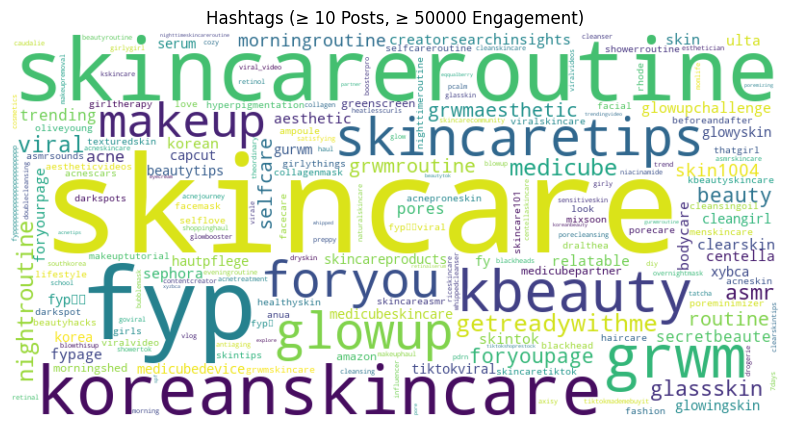

In [25]:
import ipywidgets as widgets
from IPython.display import display
from wordcloud import WordCloud

# Pre-calculate hashtag statistics
hashtag_wordcloud= hashtag_posts_filtered.groupby('hashtag_name').agg(
    total_posts=('post_id', 'nunique'),
    total_engagement=('engagement', 'sum')
).reset_index()

# Interactive function
def generate_wordcloud(min_posts=10, min_engagement=50000):
    # Filter based on widget inputs
    filtered_stats = hashtag_wordcloud[
        (hashtag_wordcloud['total_posts'] >= min_posts) &
        (hashtag_wordcloud['total_engagement'] >= min_engagement)
    ]
    
    # If no hashtags match, show message
    if filtered_stats.empty:
        print("No hashtags meet the criteria.")
        return
    
    # Convert to dict for WordCloud
    hashtag_dict = dict(zip(filtered_stats['hashtag_name'], filtered_stats['total_engagement']))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_dict)
    
    # Plot
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Hashtags (≥ {min_posts} Posts, ≥ {min_engagement} Engagement)')
    plt.show()

generate_wordcloud()


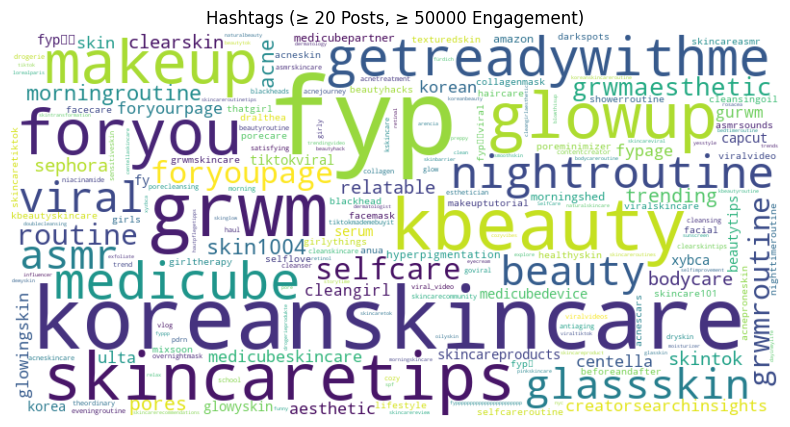

In [26]:

main_hashtags = ['skincare', 'skincareroutine', 'hautpflege', 'hauptflegeroutine']

def generate_wordcloud_nomainhashtags(min_posts=20, min_engagement=50000):
    # Filter based on widget inputs
    filtered_stats = hashtag_wordcloud[
        (hashtag_wordcloud['total_posts'] >= min_posts) &
        (hashtag_wordcloud['total_engagement'] >= min_engagement)
    ]
    
    # Exclude main hashtags
    filtered_stats = filtered_stats[~filtered_stats['hashtag_name'].isin(main_hashtags)]
    
    # If no hashtags match, show message
    if filtered_stats.empty:
        print("No hashtags meet the criteria.")
        return
    
    # Convert to dict for WordCloud
    hashtag_dict = dict(zip(filtered_stats['hashtag_name'], filtered_stats['total_engagement']))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_dict)
    
    # Plot
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Hashtags (≥ {min_posts} Posts, ≥ {min_engagement} Engagement)')
    plt.show()

generate_wordcloud_nomainhashtags()

#Co-occurance

# Hashtag Co-Occurrence and Cluster Analysis

To identify which hashtags tend to perform well **in combination**, we analyzed co-occurrence patterns from TikTok posts over the last 6 months.

### Methodology
- Extracted all hashtags used per post and created all 2-combinations (pairs).
- Counted how frequently each pair occurred across different posts.
- Built a **hashtag network graph**, where:
  - Nodes = hashtags
  - Edges = co-occurrence frequency
- Applied **greedy modularity clustering** to find thematic groups of hashtags.

### Output
- Identified the most connected hashtags (used with many others).
- Visualized the hashtag network for discovery.
- Extracted thematic clusters like:
  - `['skincare', 'spf', 'glassskin', ...]`
  - `['grwm', 'makeup', 'outfitoftheday', ...]`

### Use Case
These clusters help creators:
- Choose **complementary hashtags** that amplify reach.
- Discover **micro-niche communities**.
- Build strategic hashtag bundles that appear authentic and relevant.

### Limitations of Co-Occurrence and Clustering

1. **No Causality**: Co-occurrence ≠ effectiveness. Just because hashtags are used together doesn't mean they boost engagement.
2. **Overrepresentation of Generic Tags**: Tags like `#fyp`, `#viral`, or `#tiktok` dominate co-occurrence but may add little niche insight.
3. **Sensitive to Volume**: Clustering may reflect high-frequency patterns but not necessarily topical consistency.
4. **Temporal Bias**: Short-term trends or viral moments can distort true long-term co-occurrence relationships.
5. **Emerging Hashtags Excluded**: New or low-frequency hashtags may not appear in clusters due to lack of data.

💡 **Tip**: Use co-occurrence results as *suggestive*, not definitive. Combine with trend metrics or engagement scores for strategic hashtag selection.


In [27]:
from itertools import combinations
from collections import Counter
import pandas as pd

# Step 1: Ensure hashtags are in list form per post
# If they are already in a column per post, skip this
df = hashtag_posts_filtered.copy()
df_grouped = df.groupby('post_id')['hashtag_name'].apply(lambda x: list(set(x))).reset_index()

# Step 2: Count co-occurrence pairs
co_occurrence = Counter()
for tags in df_grouped['hashtag_name']:
    if len(tags) > 1:
        cleaned_tags = [tag for tag in tags if isinstance(tag, str) and tag.strip()]
        if len(cleaned_tags) > 1:
            for pair in combinations(sorted(cleaned_tags), 2):
                co_occurrence[pair] += 1

# Step 3: Convert to DataFrame
co_occurrence_df = pd.DataFrame([
    {'hashtag_1': h1, 'hashtag_2': h2, 'count': count}
    for (h1, h2), count in co_occurrence.items()
])

# Optional: Filter for frequently co-occurring pairs
co_occurrence_df = co_occurrence_df[co_occurrence_df['count'] >= 5]  # Adjust threshold as needed

# View top pairs
co_occurrence_df.sort_values('count', ascending=False)


,hashtag_1,hashtag_2,count
85,skincare,skincareroutine,1139
303,fyp,skincare,1013
161,hautpflege,skincare,577
4770,fyp,skincareroutine,486
8486,koreanskincare,skincare,484
...,...,...,...
76042,hautpflegeprodukt,reinehautzuhause,5
76041,hautpflegeprodukt,reinehautchallenge,5
76039,hautpflegeprodukt,porentiefereinigung,5
76038,hautpflegeprodukt,porenrein,5


In [28]:
from itertools import combinations
from collections import Counter
import pandas as pd

# Ensure the 'date' column is in pandas datetime format
hashtag_posts_filtered['date'] = pd.to_datetime(hashtag_posts_filtered['date'])

# Now filter the last 6 months
cutoff_date = pd.Timestamp.today() - pd.DateOffset(months=6)
recent_df = hashtag_posts_filtered[hashtag_posts_filtered['date'] >= cutoff_date].copy()

# Step 1: Filter to the last 6 months
cutoff_date = pd.Timestamp.today() - pd.DateOffset(months=6)
recent_df = hashtag_posts_filtered[hashtag_posts_filtered['date'] >= cutoff_date].copy()

# Step 2: Group hashtags per post
df_grouped = recent_df.groupby('post_id')['hashtag_name'].apply(lambda x: list(set(x))).reset_index()

# Step 3: Count co-occurrence of all hashtags
co_occurrence = Counter()

for tags in df_grouped['hashtag_name']:
    if isinstance(tags, list) and len(tags) > 1:
        cleaned_tags = [tag for tag in tags if isinstance(tag, str) and tag.strip()]
        for pair in combinations(sorted(cleaned_tags), 2):
            co_occurrence[pair] += 1

# Step 4: Convert to DataFrame
co_df = pd.DataFrame([
    {'hashtag_1': h1, 'hashtag_2': h2, 'count': count}
    for (h1, h2), count in co_occurrence.items()
])

# Step 5: Calculate total connections per hashtag
top_hashtags = pd.concat([
    co_df[['hashtag_1', 'count']].rename(columns={'hashtag_1': 'hashtag'}),
    co_df[['hashtag_2', 'count']].rename(columns={'hashtag_2': 'hashtag'})
]).groupby('hashtag').sum().reset_index().sort_values('count', ascending=False)

# View top co-occurring hashtags overall
top_hashtags.head(20)


,hashtag,count
12612,skincare,28708
12849,skincareroutine,19964
6523,hautpflege,18680
5321,fyp,17413
7852,koreanskincare,10064
5918,glowup,8654
12253,selfcare,7291
12894,skincaretips,7141
7571,kbeauty,7017
1865,beauty,6154


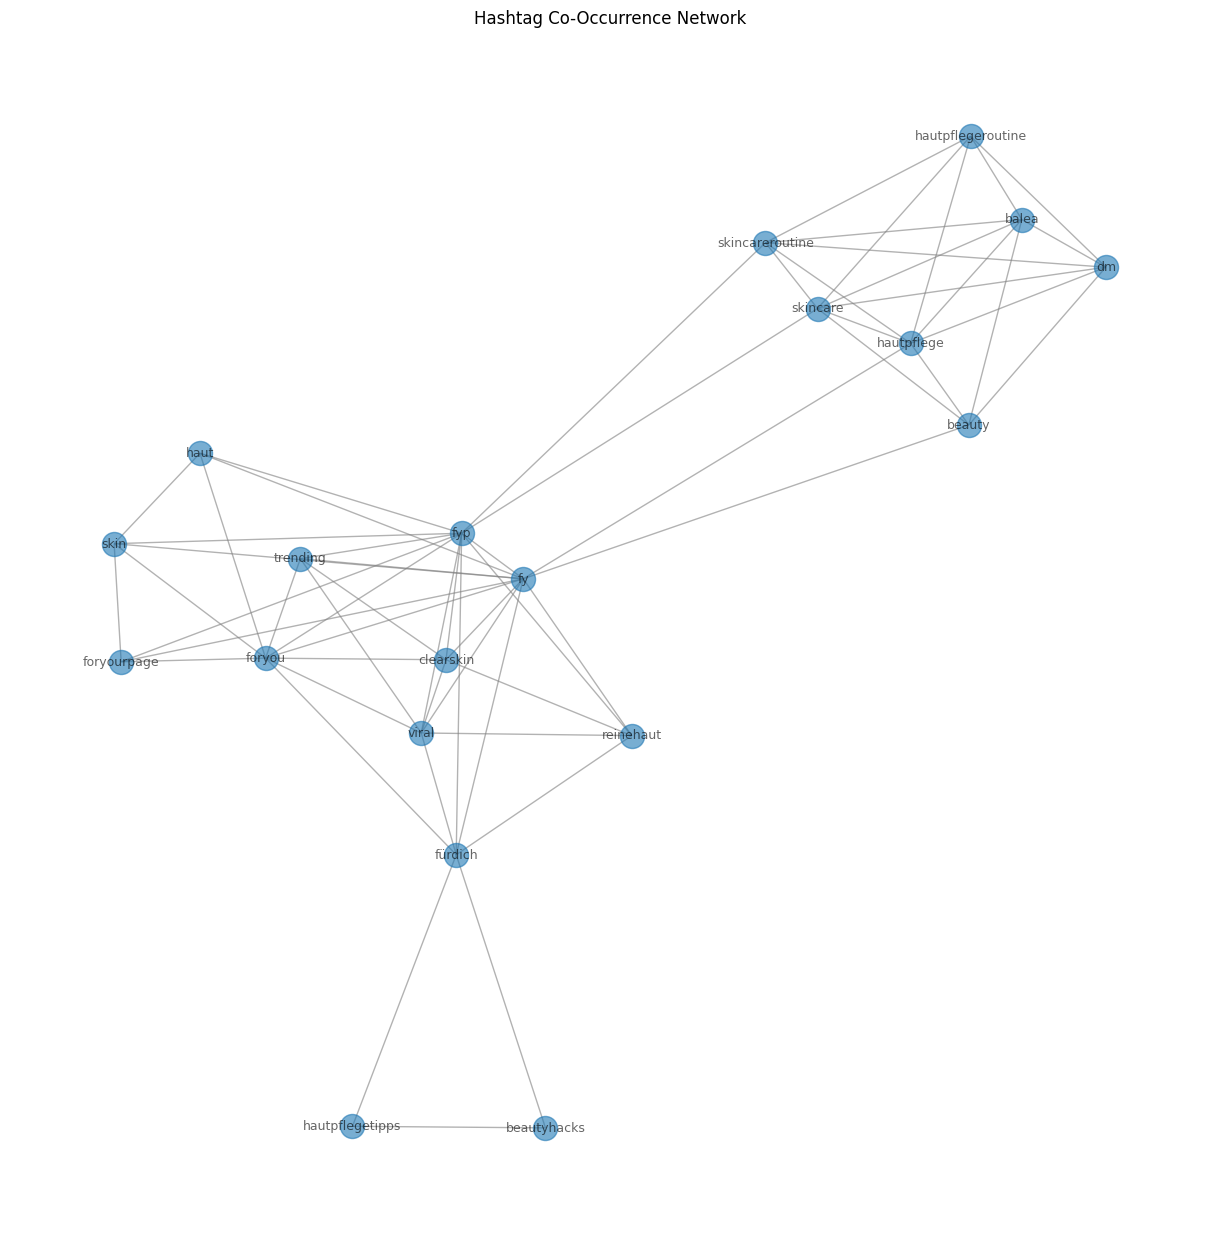

In [ ]:
import networkx as nx

# Create graph
G = nx.from_pandas_edgelist(co_occurrence_df.head(100), 'hashtag_1', 'hashtag_2', edge_attr='count')

# Optionally filter for dense network
G = G.subgraph([n for n, d in G.degree() if d > 3])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=300, font_size=9, edge_color='gray', alpha=0.6)
plt.title("Hashtag Co-Occurrence Network")
plt.show()


In [29]:
import networkx as nx
from networkx.algorithms import community
import pandas as pd

# Rebuild the graph from your co-occurrence dataframe
G = nx.from_pandas_edgelist(co_occurrence_df, 'hashtag_1', 'hashtag_2', edge_attr='count')

# Use a community detection algorithm (greedy modularity)
communities = community.greedy_modularity_communities(G)

# Convert frozen sets to list for readability
hashtag_clusters = [list(c) for c in communities]

for i, cluster in enumerate(hashtag_clusters):
    print(f"🔹 Cluster {i+1} ({len(cluster)} hashtags):", cluster[:10], '...')


🔹 Cluster 1 (783 hashtags): ['anuacleansingoil', 'fypviralシ', 'vlog', 'cosmetics', 'makeup', 'honestreview', 'girly', 'haul', 'tip', 'faceroutine'] ...
🔹 Cluster 2 (468 hashtags): ['glowyvibes', 'aha', 'neurodermitis', 'handgemacht', 'nofilter', 'celluliteweg', 'empfehlung', 'bienetre', 'beautylover', 'augenpflege'] ...
🔹 Cluster 3 (125 hashtags): ['capcut', 'videos', 'carlover', 'actiondeutschland', 'bluetooth', 'arrivage', 'tiktokfamous', 'tik', 'app', 'schnäppchen'] ...
🔹 Cluster 4 (45 hashtags): ['makeuptipps', 'makeupfehler', 'ugccontent', 'contentcreator', 'makeupziele', 'hauptstadtgörebeauty', 'makeupjourney', 'ugccommunity', 'makeuplove', 'beautylife'] ...
🔹 Cluster 5 (31 hashtags): ['haarpflegeprodukte', 'haarausfall', 'dejangarz', 'skincarefacial', 'healthyhair', 'haarwachstum', 'dejangarzhairstylist', 'kopfhautpflege', 'haarpflegeroutine', 'hairtransformation'] ...
🔹 Cluster 6 (19 hashtags): ['독일어공부', 'koreanisch', '한국어공부', 'coréen', 'корейский', 'koreanisches', 'koreanische

Which hashtags are good to use in our tiktok post

In [30]:
hashtag_posts_filtered.columns

Index(['post_id', 'text', 'textLanguage', 'createTimeISO', 'isAd',
       'author_nickName', 'author_signature', 'author_fans', 'video_duration',
       'webVideoUrl', 'diggCount', 'shareCount', 'playCount', 'collectCount',
       'commentCount', 'isSponsored', 'hashtag_name', 'hashtag_title',
       'searchHashtag_name', 'searchHashtag_views', 'location_address', 'date',
       'month', 'year', 'week', 'engagement'],
      dtype='object')

# ML Models

## Predicting TikTok Hashtag Engagement using Machine Learning

We built logistic regression models to predict whether a TikTok post will receive **above-median engagement** based on:

- **Hashtags used**
- **Caption text**
- **Play count / Like count**
- **Posting time (hour, day of week)**
- **Hashtag popularity (frequency)**

Two versions of the model were tested:
- One with `diggCount` as a numeric predictor.
- One using `playCount` and `avg_hashtag_popularity`.

### Feature Engineering
- Hashtags and captions were vectorized using `CountVectorizer`.
- Time was decomposed into hour and weekday.
- A new feature, `avg_hashtag_popularity`, was calculated by counting how often each hashtag appears.

### Model Performance
The final model achieved the following classification metrics:

### Interpretability
- Hashtag features had the highest cumulative importance.
- Captions contributed ~20–30% of the model’s decisions.
- Numeric features like play count and time were consistently positive signals.

### Custom Prediction Tool
A `predict_post_success()` function allows testing custom hashtag/caption/time inputs to estimate the likelihood of high engagement. It also highlights which hashtags had the most positive or negative impact on the prediction.


### With diggCount and enagement 

In [31]:
def train_hashtag_engagement_model(df):
    import pandas as pd
    import numpy as np
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import classification_report
    from scipy.sparse import hstack
    from collections import Counter

    # Step 1: Drop missing hashtags
    df = df.dropna(subset=['hashtag_name']).copy()

    # Step 2: Group hashtags per post
    hashtags_grouped = df.groupby('post_id')['hashtag_name'].apply(list).reset_index()

    # Step 3: Post-level features
    post_features = df.drop_duplicates(subset='post_id')[
        ['post_id', 'engagement', 'text', 'diggCount', 'date']
    ].copy()

    # Step 4: Merge
    posts = hashtags_grouped.merge(post_features, on='post_id', how='left')

    # Step 5: Target variable
    median_engagement = posts['engagement'].median()
    posts['high_engagement'] = (posts['engagement'] > median_engagement).astype(int)

    # Step 6: Time features
    posts['date'] = pd.to_datetime(posts['date'], errors='coerce')
    posts['hour'] = posts['date'].dt.hour.fillna(0).astype(int)
    posts['dayofweek'] = posts['date'].dt.dayofweek.fillna(0).astype(int)

    # Step 7: Text prep
    posts['hashtags_str'] = posts['hashtag_name'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
    posts['text'] = posts['text'].fillna('')

    # Step 8: Vectorize text & hashtags
    hashtag_vec = CountVectorizer()
    text_vec = CountVectorizer(max_features=300)

    X_hashtag = hashtag_vec.fit_transform(posts['hashtags_str'])
    X_text = text_vec.fit_transform(posts['text'])

    # Step 9: Numeric features
    num_features = posts[['diggCount', 'hour', 'dayofweek']].fillna(0)
    scaler = StandardScaler()
    X_num = scaler.fit_transform(num_features)

    # Step 10: Combine features
    X = hstack([X_hashtag, X_text, X_num])
    y = posts['high_engagement']

    # Step 11: Train model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Step 12: Evaluate
    print("📊 Model Performance:")
    print(classification_report(y_test, model.predict(X_test)))

    # Step 13: Feature importance
    feature_names = list(hashtag_vec.get_feature_names_out()) + \
                    list(text_vec.get_feature_names_out()) + \
                    ['diggCount', 'hour', 'dayofweek']

    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': model.coef_[0]
    }).sort_values('importance', ascending=False)

    return {
        'model': model,
        'hashtag_vec': hashtag_vec,
        'text_vec': text_vec,
        'scaler': scaler,
        'importance_df': importance_df,
        'posts': posts
    }

result = train_hashtag_engagement_model(hashtag_posts_filtered)

model = result['model']
importance_df = result['importance_df']
importance_df.head(10)




📊 Model Performance:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       746
           1       0.80      0.79      0.80       744

    accuracy                           0.80      1490
   macro avg       0.80      0.80      0.80      1490
weighted avg       0.80      0.80      0.80      1490



,feature,importance
15596,diggCount,14.134139
3404,dmdeutschland,1.684882
6444,hoygi,1.445318
8640,mia_manhattan_ny,1.293087
2674,collagenmask,1.233905
8806,mixsoon,1.154193
1027,aurabeauty,1.134036
8005,lorealparisskincare,1.073827
3307,deutschland,1.050445
11233,review,1.041853


### With playCount

In [32]:
def train_hashtag_model_with_popularity_playCount(df):
    import pandas as pd
    import numpy as np
    from collections import Counter
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import classification_report
    from scipy.sparse import hstack

    # Step 1: Clean & prepare
    df = df.dropna(subset=['hashtag_name']).copy()
    hashtags_grouped = df.groupby('post_id')['hashtag_name'].apply(list).reset_index()
    post_features = df.drop_duplicates(subset='post_id')[['post_id', 'engagement', 'text', 'playCount', 'date']].copy()
    posts = hashtags_grouped.merge(post_features, on='post_id', how='left')

    # Step 2: Target label
    median_engagement = posts['engagement'].median()
    posts['high_engagement'] = (posts['engagement'] > median_engagement).astype(int)

    # Step 3: Time features
    posts['date'] = pd.to_datetime(posts['date'], errors='coerce')
    posts['hour'] = posts['date'].dt.hour.fillna(0).astype(int)
    posts['dayofweek'] = posts['date'].dt.dayofweek.fillna(0).astype(int)

    # Step 4: Text/hashtag prep
    posts['hashtags_str'] = posts['hashtag_name'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
    posts['text'] = posts['text'].fillna('')

    # Step 5: Hashtag frequency
    all_hashtags = posts['hashtag_name'].explode()
    hashtag_freq = Counter(all_hashtags)
    posts['avg_hashtag_popularity'] = posts['hashtag_name'].apply(
        lambda tags: np.mean([hashtag_freq.get(tag, 0) for tag in tags]) if isinstance(tags, list) and tags else 0
    )

    # Step 6: Vectorize
    hashtag_vec = CountVectorizer()
    text_vec = CountVectorizer(max_features=300)
    X_hashtag = hashtag_vec.fit_transform(posts['hashtags_str'])
    X_text = text_vec.fit_transform(posts['text'])

    # Step 7: Numeric features
    num_features = posts[['playCount', 'hour', 'dayofweek', 'avg_hashtag_popularity']].fillna(0)
    scaler = StandardScaler()
    X_num = scaler.fit_transform(num_features)

    # Step 8: Combine
    X = hstack([X_hashtag, X_text, X_num])
    y = posts['high_engagement']

    # Step 9: Train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Step 10: Evaluate
    print("📊 Model Performance:")
    print(classification_report(y_test, model.predict(X_test)))

    # Step 11: Feature importance
    feature_names = list(hashtag_vec.get_feature_names_out()) + \
                    list(text_vec.get_feature_names_out()) + \
                    ['playCount', 'hour', 'dayofweek', 'avg_hashtag_popularity']

    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': model.coef_[0]
    }).sort_values('importance', ascending=False)

    return {
        'model': model,
        'hashtag_vec': hashtag_vec,
        'text_vec': text_vec,
        'scaler': scaler,
        'importance_df': importance_df,
        'posts': posts,
        'hashtag_freq': hashtag_freq  # useful for predictions
    }


In [34]:
results = train_hashtag_model_with_popularity_playCount(hashtag_posts_filtered)

model = results['model']
importance_df = results['importance_df']
importance_df.head(10)  # 🔍 Top predictive features


📊 Model Performance:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       746
           1       0.80      0.82      0.81       744

    accuracy                           0.81      1490
   macro avg       0.81      0.81      0.81      1490
weighted avg       0.81      0.81      0.81      1490



,feature,importance
15596,playCount,14.148838
3404,dmdeutschland,1.801436
6444,hoygi,1.410161
8640,mia_manhattan_ny,1.330285
8806,mixsoon,1.171248
2674,collagenmask,1.129044
15376,drogerie,1.122761
11233,review,1.092493
11814,selfcareasmr,1.060246
3379,diybeauty,1.050234


| **Metric**              | **Description**                                                 |
|-------------------------|-----------------------------------------------------------------|
| **Accuracy**            | The model correctly predicted **79%** of all posts overall.     |
| **Precision (Class 1)** | Of the posts predicted to go viral, this is how many actually did. |
| **Recall (Class 1)**    | The model caught **76%** of all actual high-engagement posts.   |
| **F1-score (Class 1)**  | Harmonic mean of precision and recall — measures generalization.|


In [35]:
# Get names of features by source
hashtag_features = results['hashtag_vec'].get_feature_names_out()
text_features = results['text_vec'].get_feature_names_out()
numeric_features = ['playCount', 'hour', 'dayofweek', 'avg_hashtag_popularity']

# Add type labels to the DataFrame
def classify_feature_type(f):
    if f in hashtag_features:
        return 'hashtag'
    elif f in text_features:
        return 'caption'
    elif f in numeric_features:
        return 'numeric'
    else:
        return 'other'

importance_df['type'] = importance_df['feature'].apply(classify_feature_type)
# Aggregate total absolute weight by type
summary = importance_df.groupby('type')['importance'].agg(['count', 'mean', 'sum', lambda x: x.abs().sum()])
summary.columns = ['feature_count', 'mean_importance', 'total_signed_importance', 'total_abs_importance']
summary = summary.sort_values('total_abs_importance', ascending=False)

print("📊 Feature Importance Summary by Type:")
print(summary)


📊 Feature Importance Summary by Type:
         feature_count  mean_importance  total_signed_importance  \
type                                                               
hashtag          15456        -0.001160               -17.922541   
caption            140        -0.044788                -6.270343   
numeric              4         3.588103                14.352413   

         total_abs_importance  
type                           
hashtag           1848.824442  
caption             34.178469  
numeric             14.372327  


+ The model gives the most weight overall to hashtags — some boost engagement a lot, others hurt it.
+ Caption content does have impact, but much less than hashtags.
+ Your numeric features (like playCount, hour, etc.) also play a significant role — with consistent positive influence.

In [36]:
def predict_post_success(
    hashtags,
    caption,
    play_count,
    hour,
    dayofweek,
    results,
    caption_weight=1.0,
    hashtag_weight=1.0,
    return_confidence_label=True
):
    """
    Predict high engagement probability for a TikTok post.
    - hashtags: list of hashtags used
    - caption: string (post text)
    - play_count, hour, dayofweek: numeric features
    - results: output from train_hashtag_model_with_popularity_playCount()
    - caption_weight, hashtag_weight: scale the effect of text/hashtags
    - return_confidence_label: if True, returns a user-friendly label
    """

    import numpy as np
    import pandas as pd
    from scipy.sparse import hstack

    # Unpack model components
    hashtag_vec = results['hashtag_vec']
    text_vec = results['text_vec']
    scaler = results['scaler']
    model = results['model']
    importance_df = results['importance_df']
    hashtag_freq = results['hashtag_freq']

    # Vectorize hashtags and caption
    hashtags_str = ' '.join(hashtags)
    X_hashtag = hashtag_vec.transform([hashtags_str]) * hashtag_weight
    X_text = text_vec.transform([caption]) * caption_weight

    # Compute avg hashtag popularity
    avg_popularity = np.mean([hashtag_freq.get(tag, 0) for tag in hashtags]) if hashtags else 0

    # Scale numeric features
    numeric_input = pd.DataFrame([[play_count, hour, dayofweek, avg_popularity]],
                                 columns=['playCount', 'hour', 'dayofweek', 'avg_hashtag_popularity'])
    X_num = scaler.transform(numeric_input)

    # Combine all features
    X_new = hstack([X_hashtag, X_text, X_num])
    prob = model.predict_proba(X_new)[0][1]  # Probability of high engagement

    # Get hashtag-specific estimated impact
    hashtag_importance_dict = dict(zip(importance_df['feature'], importance_df['importance']))
    tag_impact = {tag: hashtag_importance_dict.get(tag.lower(), 0) for tag in hashtags}
    tag_impact_df = pd.DataFrame(list(tag_impact.items()), columns=['hashtag', 'estimated_impact']) \
                      .sort_values('estimated_impact', ascending=False)

    # Optional: confidence band
    if return_confidence_label:
        if prob >= 0.8:
            confidence = "🔥 Highly Likely to Perform Well"
        elif prob >= 0.6:
            confidence = "👍 Likely to Perform OK"
        elif prob >= 0.4:
            confidence = "🤔 Uncertain Performance"
        else:
            confidence = "⚠️ Unlikely to Perform Well"
        return prob, tag_impact_df, confidence

    return prob, tag_impact_df


In [37]:
text_features = results['text_vec'].get_feature_names_out()
caption_words = results['importance_df'][
    results['importance_df']['feature'].isin(text_features)
].sort_values('importance', ascending=False)

caption_words

,feature,importance,type
15376,drogerie,1.122761,hashtag
2359,centella,0.962816,hashtag
3307,deutschland,0.931986,hashtag
15425,hautgesundheit,0.911046,hashtag
15364,deiner,0.894966,caption
...,...,...,...
15586,wirklich,-0.878350,caption
15593,zum,-0.948503,caption
15400,fühlt,-0.959574,caption
8404,mask,-1.050471,hashtag


In [38]:
total_importance_caption = caption_words['importance'].abs().sum()
total_importance_all = results['importance_df']['importance'].abs().sum()

print(f"📌 Caption accounts for ~{(total_importance_caption / total_importance_all * 100):.1f}% of the model's decisions.")


📌 Caption accounts for ~6.1% of the model's decisions.


In [39]:
hashtags = ['skincare', 'funny']
caption = "My skincare routine is 🔥 and super effective!"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=20, hour=19, dayofweek=6,
    results=results,
    caption_weight=1.5  # increase text impact
)

print(f"🎯 High Engagement Probability: {pred_prob:.2%}")
print(f"{confidence}")
display(tag_effects)


🎯 High Engagement Probability: 45.36%
🤔 Uncertain Performance


,hashtag,estimated_impact
1,funny,0.622172
0,skincare,-0.082991


In [40]:
hashtags = ['skincare', 'dermatologisttips', 'spf', 'glassskin']
caption = "Derm-approved routine for radiant skin ✨ #SPF is a must!"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=25, hour=10, dayofweek=1,  # Monday morning
    results=results
)
print(f"🎯 High Engagement Probability: {pred_prob:.2%}")
print(f"{confidence}")
display(tag_effects)



🎯 High Engagement Probability: 53.57%
🤔 Uncertain Performance


,hashtag,estimated_impact
3,glassskin,0.200985
1,dermatologisttips,0.000000
0,skincare,-0.082991
2,spf,-0.327915


In [41]:
hashtags = ['skincarestruggles', 'funny', 'pimplepatch', 'reallife']
caption = "When your skin waits until picture day to break out 😩 #relatable"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=30, hour=21, dayofweek=4,  # Thursday night
    results=results,
    caption_weight=1.5
)

print("Basic Product Review")
print(f"📉 High Engagement Probability: {pred_prob:.2%}")
display(tag_effects)


Basic Product Review
📉 High Engagement Probability: 80.09%


,hashtag,estimated_impact
1,funny,0.622172
2,pimplepatch,0.330466
0,skincarestruggles,0.000000
3,reallife,-0.028467


In [42]:
hashtags = ['moisturizerreview', 'byoma', 'skincaretok', 'fyp']
caption = "Tried the new BYOMA gel cream — worth the hype? Here’s my honest review 👀"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=12, hour=16, dayofweek=3,  # Wednesday afternoon
    results=results
)


print("Educational Skincare")
print(f"📊 High Engagement Probability: {pred_prob:.2%}")
display(tag_effects)


Educational Skincare
📊 High Engagement Probability: 68.69%


,hashtag,estimated_impact
0,moisturizerreview,0.152637
3,fyp,-0.057327
1,byoma,-0.164124
2,skincaretok,-0.299170


In [ ]:
hashtags = ['london', 'ad', 'naturkosmetik']
caption = "💥💥💥"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=5, hour=7, dayofweek=0,  # Sunday morning
    results=results
)


print("Educational Skincare")
print(f"📊 High Engagement Probability: {pred_prob:.2%}")
display(tag_effects)


Educational Skincare
📊 High Engagement Probability: 7.65%


,hashtag,estimated_impact
0,london,0.142704
2,naturkosmetik,-0.793025
1,ad,-0.942093


In [43]:
hashtags = ['berlin', 'ad', 'naturkosmetik']
caption = "💥💥💥"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=5, hour=7, dayofweek=0,  # Sunday morning
    results=results
)


print("Educational Skincare")
print(f"📊 High Engagement Probability: {pred_prob:.2%}")
display(tag_effects)


Educational Skincare
📊 High Engagement Probability: 35.96%


,hashtag,estimated_impact
1,ad,0.160978
2,naturkosmetik,-0.229751
0,berlin,-0.484381


In [ ]:
hashtags = ['nyc', 'ad', 'naturkosmetik']
caption = "💥💥💥"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=5, hour=7, dayofweek=0,  # Sunday morning
    results=results
)


print("Educational Skincare")
print(f"📊 High Engagement Probability: {pred_prob:.2%}")
display(tag_effects)


Educational Skincare
📊 High Engagement Probability: 8.84%


,hashtag,estimated_impact
0,nyc,0.300752
2,naturkosmetik,-0.793025
1,ad,-0.942093


In [44]:
hashtags = ['dubai', 'ad', 'naturkosmetik']
caption = "💥💥💥"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=5, hour=7, dayofweek=0,  # Sunday morning
    results=results
)


print("Educational Skincare")
print(f"📊 High Engagement Probability: {pred_prob:.2%}")
display(tag_effects)


Educational Skincare
📊 High Engagement Probability: 56.64%


,hashtag,estimated_impact
0,dubai,0.363565
1,ad,0.160978
2,naturkosmetik,-0.229751
